

# Project: TMDb movie data analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

###  1.Data source: tmdb-movies.csv
For the project I have chosen to analysis the TMDb dataset. This dataset contains information about 10,000 movies collected from the Movie Database(TMDb), and cleaned from original data on Kaggle.

###  2.Questions:
* Which genres are most popular from year to year? 
* What kinds of properties are associated with movies that have high revenues?
* What kinds of properties are asscoiated with average score of the movie?

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [78]:
# Load the data and check 
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [79]:
#See the dimesions of the dataframe
df.shape

(10866, 21)

In [80]:
#See the descriptive statistics for each column of the data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [81]:
#See the column's name and the number of non-null values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Drop the irrelevant columns
Since our questions is basically about the movie's properties and their revenue or popularity, we can drop the column's which have no relations with our questions. 
* **imdb_id**: It seems repeated with the id which also identify the movie and it have null vaules so we can keep the id and drop the imdb_id.
* **budget and revenue**: Since the budget_adj and revenue_adj are accounting for inflation over time, which maybe more justified, so we will keep it and drop the budget and revenue columns.
* **homepage,tagline,overview,and keywords**:These informations is related to the movie's content, seems unrelated with our analysis.
* **release_year**: Since the release data already included the release year, we can drop it.

In [82]:
#Drop the columns that irrelevant with our analysis.
df.drop(['imdb_id','budget','revenue','homepage','tagline','keywords','release_year','overview'],axis=1,inplace=True)

In [83]:
#Check the new dataframe
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,1.747999e+08,1.385749e+09


In [84]:
#Check the statistics of the new dataframe
df.describe()

,id,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.070863,217.389748,5.974922,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,31.381405,575.619058,0.935142,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


#### The initial insights from the descriptive statistics of the dataset  
From the descriptive statistics we can find that the format of the id is not unify, the minimum id is 5, but the maximum id is 417859. We also can see that over 50% movies have zero budget and zero revenue which is a little bit strange. And it seems have several outliers of the popularity and runtime. We have to explore tha data further and deal with these problems.

In [85]:
#Check the new dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   original_title        10866 non-null  object 
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.1+ MB


In [86]:
#Check the sum of null vaules in each column
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [94]:
#Check the duplicated data 
df[df.duplicated()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
2090,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,30000000.0,967000.0


#### Drop the null value of genres and the duplicated data
The other column's contain the null value need to be further explored.

In [112]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['genres'],axis=0,inplace=True)

In [113]:
#Check the sum of null values after cleaning the null value of genres
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      75
director                  42
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [114]:
#Check the duplicated data 
df.duplicated().sum()

0

In [115]:
#See the data that the columns of cast is null.
df[df.cast.isnull()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
371,345637,0.422901,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,0.000000,0.0
441,355020,0.220751,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,0.000000,0.0
465,321109,0.201696,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,1/24/15,19,7.8,0.000000,0.0
536,333350,0.122543,A Faster Horse,NaN,David Gelb,90,Documentary,NaN,10/8/15,12,8.0,0.000000,0.0
538,224972,0.114264,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,1/1/15,11,8.9,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,0.253376,Red's Dream,NaN,John Lasseter,4,Animation,Pixar Animation Studios,8/17/87,44,6.6,0.000000,0.0
9755,48714,0.046272,The Big Shave,NaN,Martin Scorsese,6,Drama,NaN,1/1/68,12,6.7,0.000000,0.0
10434,48784,0.146906,Six Men Getting Sick,NaN,David Lynch,4,Animation,Pensylvania Academy of Fine Arts,1/1/67,16,5.2,1307.352748,0.0
10550,13925,0.306425,Luxo Jr.,NaN,John Lasseter,2,Animation|Family,Pixar Animation Studios,8/17/86,81,7.3,0.000000,0.0


In [116]:
#See the data that the columns of production companies is null.
df[df.director.isnull()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
532,320996,0.126594,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,0.000000e+00,0.000000e+00
548,355131,0.108072,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,0.000000e+00,0.000000e+00
556,321160,0.100910,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,0.000000e+00,0.000000e+00
1032,259910,0.291253,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,0.000000e+00,0.000000e+00
1054,253675,0.269468,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,0.000000e+00,0.000000e+00
1203,256561,0.119891,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,75,Documentary,Valve,3/19/14,40,7.0,1.381637e+05,0.000000e+00
1241,296370,0.135376,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,0.000000e+00,0.000000e+00
1288,301235,0.038364,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,94,Documentary,2 Entertain Video,11/17/14,12,6.8,0.000000e+00,0.000000e+00
1852,133365,0.256703,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,100,Drama,Darlow Smithson Productions|British Broadcasti...,1/9/09,19,7.5,0.000000e+00,0.000000e+00
1872,26379,0.091395,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,133,Drama|Family|Foreign,A B Corp,12/4/09,11,6.1,3.303301e+06,0.000000e+00


In [89]:
#See the data that the columns of production companies is null.
df[df.production_companies.isnull()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
228,300792,0.584363,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,1/24/15,36,7.8,0.0,0.0
259,360603,0.476341,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,11/27/15,10,7.6,0.0,0.0
295,363483,0.417191,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,11/26/15,12,6.3,0.0,0.0
298,354220,0.370258,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,0.0,0.0
328,308457,0.367617,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,15867,0.149259,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,Woody Allen,93,Drama,NaN,8/2/78,35,6.3,0.0,0.0
10806,24998,0.138635,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,Errol Morris,85,Documentary,NaN,10/1/78,12,5.9,0.0,0.0
10816,16378,0.064602,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,76,Comedy,NaN,3/22/78,14,6.0,0.0,0.0
10842,36540,0.253437,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,Wolfgang Reitherman,25,Animation|Family,NaN,1/1/66,12,7.9,0.0,0.0


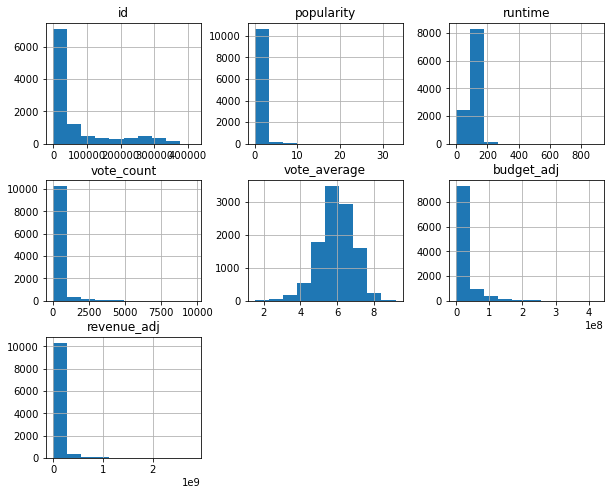

In [90]:
#See the whole dataset's histgram 
df.hist(figsize=(10,8));

In [13]:
df[df.director.isnull()]

,popularity,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
532,0.126594,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,Smart and brazen comedian Iliza Shlesinger sha...,71,Comedy,1/23/15,14,6.6,0.000000e+00,0.000000e+00
548,0.108072,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,0.000000e+00,0.000000e+00
556,0.100910,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,After attending their friend Elise's (Sudano) ...,105,Comedy|Romance,1/24/15,14,6.5,0.000000e+00,0.000000e+00
1032,0.291253,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,A look at the story behind Marvel Studios and ...,43,TV Movie|Documentary,3/18/14,32,6.3,0.000000e+00,0.000000e+00
1054,0.269468,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,Explore how writers Steven Moffat and Mark Gat...,60,TV Movie|Documentary,1/19/14,11,7.2,0.000000e+00,0.000000e+00
1203,0.119891,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,Follow three professional video game players a...,75,Documentary,3/19/14,40,7.0,1.381637e+05,0.000000e+00
1241,0.135376,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,1/1/14,18,5.7,0.000000e+00,0.000000e+00
1288,0.038364,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,In 2013 Jeremy Clarkson and Richard Hammond em...,94,Documentary,11/17/14,12,6.8,0.000000e+00,0.000000e+00
1852,0.256703,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,Called the most accurate adaptation of Anne Fr...,100,Drama,1/9/09,19,7.5,0.000000e+00,0.000000e+00
1872,0.091395,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,He suffers from a progeria like syndrome. Ment...,133,Drama|Family|Foreign,12/4/09,11,6.1,3.303301e+06,0.000000e+00


In [14]:
df[df. genres.isnull()]

,popularity,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
424,0.244648,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,10/29/15,21,6.1,0.00000,0.0
620,0.129696,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,A woman finds a VHS tape on her doorstep that ...,90,NaN,10/6/15,13,5.0,0.00000,0.0
997,0.330431,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,10/3/14,13,6.8,0.00000,0.0
1712,0.302095,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,"True story of Mary Griffith, gay rights crusad...",88,NaN,2/27/09,57,7.4,0.00000,0.0
1897,0.020701,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,2/27/09,11,7.0,0.00000,0.0
2370,0.081892,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,NaN,0,NaN,6/5/10,12,5.8,0.00000,0.0
2376,0.068411,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,12/25/10,11,7.7,0.00000,0.0
2853,0.130018,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,The story takes place in a small town (called ...,110,NaN,2/2/01,12,7.2,0.00000,0.0
3279,0.145331,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,8/13/08,11,6.1,0.00000,0.0
4547,0.520520,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,The London 2012 Olympic Games Opening Ceremony...,220,NaN,7/27/12,12,8.3,0.00000,0.0


In [15]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10730 non-null  float64
 1   original_title  10730 non-null  object 
 2   cast            10730 non-null  object 
 3   director        10730 non-null  object 
 4   overview        10730 non-null  object 
 5   runtime         10730 non-null  int64  
 6   genres          10730 non-null  object 
 7   release_date    10730 non-null  object 
 8   vote_count      10730 non-null  int64  
 9   vote_average    10730 non-null  float64
 10  budget_adj      10730 non-null  float64
 11  revenue_adj     10730 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.1+ MB


In [26]:
sum(df.duplicated())

1

### Data Cleaning( Replace this with more specific notes!)

In [16]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 Which genres are most popular from year to year?

In [17]:
#Check the unique genres of the dataset 
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

As we can see, there have lots of Movie has much more than one genre, for better analysis the relativeness between the genres and the popularity, we need to process the genre data.

In [20]:
#Get all the movie's that have more than one genre
genres=df[df['genres'].str.contains('|')]
genres

,popularity,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,6/15/66,11,7.4,0.000000e+00,0.000000e+00
10862,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,12/21/66,20,5.7,0.000000e+00,0.000000e+00
10863,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,1/1/66,11,6.5,0.000000e+00,0.000000e+00
10864,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,11/2/66,22,5.4,0.000000e+00,0.000000e+00


In [ ]:
#Create a copy of the 

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!